In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = YOLO('best.pt')


image 1/1 /Users/mcmk/projects/face_centering/images.jpeg: 640x640 1 Human Face, 112.3ms
Speed: 1.6ms preprocess, 112.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


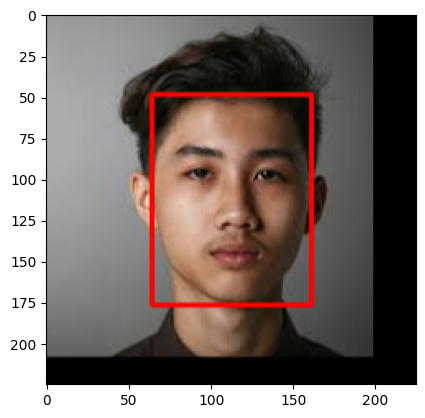

In [3]:
img = cv2.cvtColor(cv2.imread('images.jpeg'), cv2.COLOR_BGR2RGB)
res = model('images.jpeg')
boxes = []
for box in res[0].boxes:
    boxes.append(list(map(round, box.xyxy[0].tolist())))

for i in boxes: 
    cv2.rectangle(img, (i[0], i[1]), (i[2], i[3]), (255, 0, 0), 2)
front_box = max(boxes, key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))
box_center = [(front_box[0] + front_box[2]) / 2, (front_box[1] + front_box[3]) / 2]
window_center = [img.shape[0] / 2, img.shape[1] / 2]
x_shift, y_shift = window_center[0] - box_center[0], window_center[1] - box_center[1]
translation_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])  
img_translation = cv2.warpAffine(img, translation_matrix, (img.shape[0], img.shape[1]))
plt.imshow(img_translation)

In [ ]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    res = model(frame)
    boxes = []
    for box in res[0].boxes:
        boxes.append(list(map(round, box.xyxy[0].tolist())))
    front_box = max(boxes, key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))
    box_center = [(front_box[0] + front_box[2]) / 2, (front_box[1] + front_box[3]) / 2]
    window_center = [frame.shape[0] / 2, frame.shape[1] / 2]
    x_shift, y_shift = window_center[0] - box_center[0], window_center[1] - box_center[1]
    translation_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]]) 
    img_translation = cv2.warpAffine(frame.copy(), translation_matrix, (frame.shape[0], frame.shape[1]))
    rect = cv2.rectangle(frame.copy(), (front_box[0], front_box[1]), (front_box[2], front_box[3]), (255, 0, 0), 2)
    cv2.imshow('frame', img_translation)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 1 Human Face, 72.9ms
Speed: 1.3ms preprocess, 72.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)

0: 384x640 1 Human Face, 78.0ms
Speed: 1.5ms preprocess, 78.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)

0: 384x640 1 Human Face, 82.2ms
Speed: 1.3ms preprocess, 82.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)

0: 384x640 1 Human Face, 76.4ms
Speed: 1.3ms preprocess, 76.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)

0: 384x640 1 Human Face, 74.8ms
Speed: 1.1ms preprocess, 74.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)

0: 384x640 1 Human Face, 68.7ms
Speed: 1.1ms preprocess, 68.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)



2025-03-25 16:11:04.647 Python[63545:4110533] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-25 16:11:04.647 Python[63545:4110533] +[IMKInputSession subclass]: chose IMKInputSession_Modern


0: 384x640 1 Human Face, 87.1ms
Speed: 1.5ms preprocess, 87.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)

0: 384x640 1 Human Face, 84.7ms
Speed: 1.2ms preprocess, 84.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)

0: 384x640 1 Human Face, 83.3ms
Speed: 1.2ms preprocess, 83.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)

0: 384x640 1 Human Face, 59.1ms
Speed: 1.2ms preprocess, 59.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)

0: 384x640 1 Human Face, 66.9ms
Speed: 1.1ms preprocess, 66.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)

0: 384x640 1 Human Face, 62.3ms
Speed: 1.1ms preprocess, 62.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
(720, 1280, 3)

0: 384x640 1 Human Face, 72.9ms
Speed: 1.3ms preprocess, 72.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
(

KeyboardInterrupt: 

: 